In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:

# Read train and test data from files with space delimiter
train_data = pd.read_csv('train_data.txt', delimiter=' ', header=None)
test_data = pd.read_csv('test_data.txt', delimiter=' ', header=None)

# Read train and test labels from files with space delimiter
train_labels = pd.read_csv('train_labels.txt', delimiter=' ', header=None).values.ravel()
test_labels = pd.read_csv('test_labels.txt', delimiter=' ', header=None).values.ravel()

# Check the shapes of the DataFrames
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)


Train data shape: (404, 13)
Test data shape: (102, 13)
Train labels shape: (404,)
Test labels shape: (102,)


In [3]:

# Standardize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [4]:
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (404, 13)
Test data shape: (102, 13)


In [5]:
# Convert to numpy arrays
train_data = np.array(train_data)
test_data = np.array(test_data)

In [6]:
# Add bias term
X0_train = np.ones((train_data.shape[0], 1))
train_data = np.hstack((X0_train, train_data))

X0_test = np.ones((test_data.shape[0], 1))
test_data = np.hstack((X0_test, test_data))

In [7]:
train_data.shape

(404, 14)

In [8]:
# Initialize theta
theta = np.zeros(train_data.shape[1], dtype=np.float64)

In [9]:
# Prediction function
def predict(X, theta):
    return X.dot(theta)

In [10]:
# Compute cost function (Mean Squared Error)
def computeCost(X, y, theta):
    error = (predict(X, theta) - y)
    sqerror = np.power(error, 2)
    return (1/(2*len(y))) * np.sum(sqerror)

In [11]:
def gradientDescent(X, y, theta, alpha, epochs):
    cost_history = []
    for epoch in range(epochs):
        y_pred = predict(X, theta)
        cost = computeCost(X, y, theta)
        cost_history.append(cost)

        gradients = (1/len(y)) * X.T.dot(y_pred - y)
        theta = theta - alpha * gradients
    return theta, cost_history

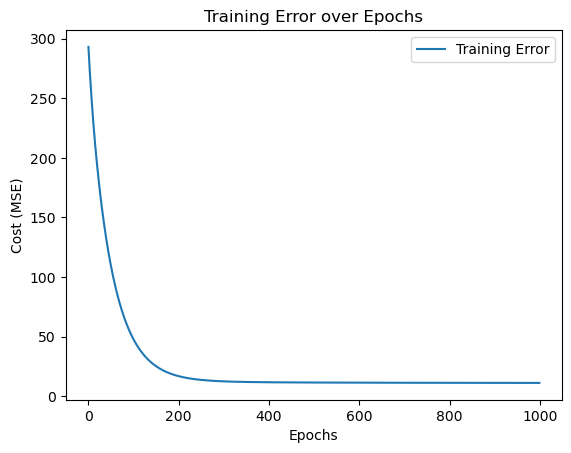

Optimal theta: [22.39408268 -0.96023063  1.07487242 -0.3147249   1.05361263 -1.87127643
  2.6480569   0.05149375 -3.06307631  1.60981654 -0.6976884  -1.8527513
  0.86287711 -3.90720887]


In [12]:
alpha = 0.01
epochs = 1000

# Run gradient descent
theta, cost_history = gradientDescent(train_data, train_labels, theta, alpha, epochs)

# Plot the cost history (training error) over epochs
plt.plot(range(epochs), cost_history, label='Training Error')
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Training Error over Epochs")
plt.legend()
plt.show()

# Print final theta values and MSE on test data
print("Optimal theta:", theta)
test_predictions = predict(test_data, theta)
mse_test = mean_squared_error(test_labels, test_predictions)

In [13]:
test_predictions = predict(test_data, theta)
mse_test = mean_squared_error(test_labels, test_predictions)
mae_test = mean_absolute_error(test_labels, test_predictions)
r2_test = r2_score(test_labels, test_predictions)

print(f"Mean Squared Error (MSE) on test data: {mse_test}")
print(f"Mean Absolute Error (MAE) on test data: {mae_test}")
print(f"R-squared (R²) on test data: {r2_test}")

Mean Squared Error (MSE) on test data: 22.54834036798687
Mean Absolute Error (MAE) on test data: 3.4108111043647615
R-squared (R²) on test data: 0.7291290495462424


# Using Sklearn Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(train_data,train_labels)

LinearRegression()

In [17]:
y_pred = lr.predict(test_data)

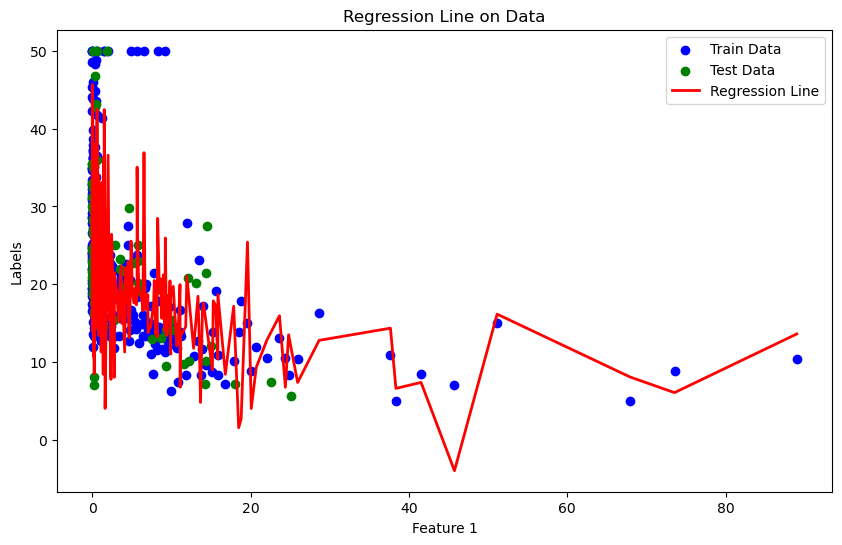

Training Mean Squared Error (MSE): 22.004800838348142
Training Mean Absolute Error (MAE): 3.3517390725615526
Training R-squared (R²): 0.7399643695249462
Test Mean Squared Error (MSE): 23.195599256423
Test Mean Absolute Error (MAE): 3.4641858124067184
Test R-squared (R²): 0.721353593462155


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Read train and test data from files with space delimiter
train_data = pd.read_csv('train_data.txt', delimiter=' ', header=None)
test_data = pd.read_csv('test_data.txt', delimiter=' ', header=None)

# Read train and test labels from files with space delimiter
train_labels = pd.read_csv('train_labels.txt', delimiter=' ', header=None).values.ravel()
test_labels = pd.read_csv('test_labels.txt', delimiter=' ', header=None).values.ravel()

# Standardize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Initialize and train the model
model = LinearRegression()
model.fit(train_data, train_labels)

# Make predictions
train_predictions = model.predict(train_data)
test_predictions = model.predict(test_data)

# Plotting the regression line for the first feature (feature at index 0)
plt.figure(figsize=(10, 6))

# Inverse transform to get back to original scale for plotting
train_data_original = scaler.inverse_transform(train_data)[:, 0]
test_data_original = scaler.inverse_transform(test_data)[:, 0]

# Sort the values for better plotting
sorted_indices = np.argsort(train_data_original)
train_data_sorted = train_data_original[sorted_indices]
train_predictions_sorted = train_predictions[sorted_indices]

plt.scatter(train_data_original, train_labels, color='blue', label='Train Data')
plt.scatter(test_data_original, test_labels, color='green', label='Test Data')
plt.plot(train_data_sorted, train_predictions_sorted, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Feature 1')
plt.ylabel('Labels')
plt.title('Regression Line on Data')
plt.legend()
plt.show()

# Print metrics
mse_train = mean_squared_error(train_labels, train_predictions)
mae_train = mean_absolute_error(train_labels, train_predictions)
r2_train = r2_score(train_labels, train_predictions)

mse_test = mean_squared_error(test_labels, test_predictions)
mae_test = mean_absolute_error(test_labels, test_predictions)
r2_test = r2_score(test_labels, test_predictions)

print(f"Training Mean Squared Error (MSE): {mse_train}")
print(f"Training Mean Absolute Error (MAE): {mae_train}")
print(f"Training R-squared (R²): {r2_train}")

print(f"Test Mean Squared Error (MSE): {mse_test}")
print(f"Test Mean Absolute Error (MAE): {mae_test}")
print(f"Test R-squared (R²): {r2_test}")


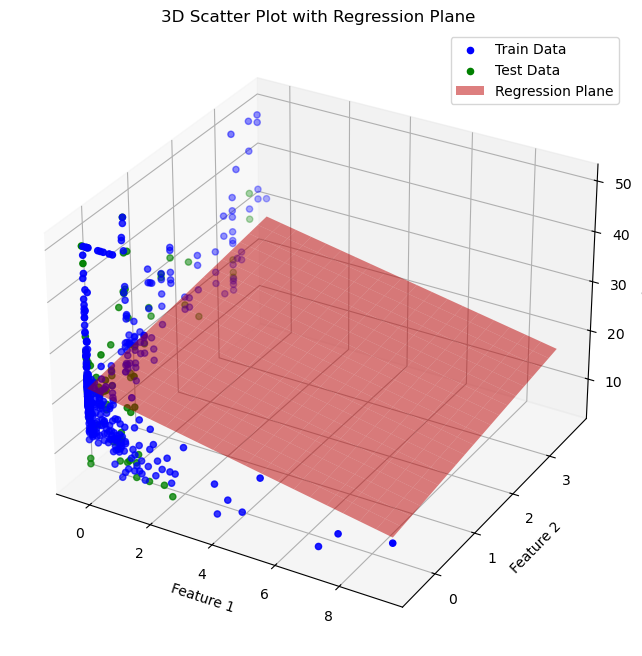

Training Mean Squared Error (MSE): 22.004800838348142
Training Mean Absolute Error (MAE): 3.3517390725615526
Training R-squared (R²): 0.7399643695249462
Test Mean Squared Error (MSE): 23.195599256423
Test Mean Absolute Error (MAE): 3.4641858124067184
Test R-squared (R²): 0.721353593462155


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

# Read train and test data from files with space delimiter
train_data = pd.read_csv('train_data.txt', delimiter=' ', header=None)
test_data = pd.read_csv('test_data.txt', delimiter=' ', header=None)

# Read train and test labels from files with space delimiter
train_labels = pd.read_csv('train_labels.txt', delimiter=' ', header=None).values.ravel()
test_labels = pd.read_csv('test_labels.txt', delimiter=' ', header=None).values.ravel()

# Standardize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Initialize and train the model
model = LinearRegression()
model.fit(train_data, train_labels)

# Make predictions
train_predictions = model.predict(train_data)
test_predictions = model.predict(test_data)

# Select the first two features for 3D visualization
feature1_index = 0
feature2_index = 1

# Plotting the regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of training and test data
ax.scatter(train_data[:, feature1_index], train_data[:, feature2_index], train_labels, color='blue', label='Train Data')
ax.scatter(test_data[:, feature1_index], test_data[:, feature2_index], test_labels, color='green', label='Test Data')

# Create a meshgrid for the plane
x_surf, y_surf = np.meshgrid(np.linspace(train_data[:, feature1_index].min(), train_data[:, feature1_index].max(), 20),
                             np.linspace(train_data[:, feature2_index].min(), train_data[:, feature2_index].max(), 20))

# Predict using the model to create the plane
z_surf = model.intercept_ + model.coef_[feature1_index] * x_surf + model.coef_[feature2_index] * y_surf

# Plot the surface
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5, label='Regression Plane')

ax.set_xlabel(f'Feature {feature1_index + 1}')
ax.set_ylabel(f'Feature {feature2_index + 1}')
ax.set_zlabel('Labels')
ax.set_title('3D Scatter Plot with Regression Plane')
ax.legend()

plt.show()

# Print metrics
mse_train = mean_squared_error(train_labels, train_predictions)
mae_train = mean_absolute_error(train_labels, train_predictions)
r2_train = r2_score(train_labels, train_predictions)

mse_test = mean_squared_error(test_labels, test_predictions)
mae_test = mean_absolute_error(test_labels, test_predictions)
r2_test = r2_score(test_labels, test_predictions)

print(f"Training Mean Squared Error (MSE): {mse_train}")
print(f"Training Mean Absolute Error (MAE): {mae_train}")
print(f"Training R-squared (R²): {r2_train}")

print(f"Test Mean Squared Error (MSE): {mse_test}")
print(f"Test Mean Absolute Error (MAE): {mae_test}")
print(f"Test R-squared (R²): {r2_test}")
